In [162]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

obs = genfromtxt('export.csv', delimiter=',', dtype=(int, float, float, float, float, float, int, bool), skip_header=1)

valid_obs = [x for x in obs if x[7] == True]

valid_obs


[(0,   1.51132767e+12,  600.,  225.,  25.,  300., 16,  True),
 (8,   1.51132767e+12,  300.,  225.,  25.,  300., 16,  True),
 (1,   1.51132767e+12,  588.58192988,  282.40251485,  25.,  300., 16,  True),
 (9,   1.51132767e+12,  311.41807012,  167.59748515,  25.,  300., 16,  True),
 (2,   1.51132768e+12,  556.06601718,  331.06601718,  25.,  300., 16,  True),
 (10,   1.51132768e+12,  343.93398282,  118.93398282,  25.,  300., 16,  True),
 (3,   1.51132768e+12,  507.40251485,  363.58192988,  25.,  300., 16,  True),
 (11,   1.51132768e+12,  392.59748515,  86.41807012,  25.,  300., 16,  True),
 (4,   1.51132768e+12,  450.,  375.,  25.,  300., 16,  True),
 (12,   1.51132768e+12,  450.,  75.,  25.,  300., 16,  True),
 (5,   1.51132768e+12,  392.59748515,  363.58192988,  25.,  300., 16,  True),
 (13,   1.51132768e+12,  507.40251485,  86.41807012,  25.,  300., 16,  True),
 (6,   1.51132768e+12,  343.93398282,  331.06601718,  25.,  300., 16,  True),
 (14,   1.51132769e+12,  556.06601718,  118.93398

In [163]:
folded_obs = []

for i in range(0, len(valid_obs)):
    r = {}
    if i + 1 < len(valid_obs) and valid_obs[i][0] + valid_obs[i][6]/2 == valid_obs[i + 1][0]:
        r['pair'] = str(valid_obs[i][0]) + '-' + str(valid_obs[i+1][0])
        r['mt'] = valid_obs[i + 1][1] - valid_obs[i][1]
        r['d'] = valid_obs[i][5]
        r['w'] = 2 * valid_obs[i][4]
        r['id'] = math.log((r['d'] / r['w'] + 1), 2)
        r['id_over_mt'] = r['id'] / r['mt']
        r['n'] = valid_obs[i][6]
        folded_obs.append(r)

folded_obs


[{'d': 300.0,
  'id': 2.807354922057604,
  'id_over_mt': 0.0025155510054279606,
  'mt': 1116.0,
  'n': 16,
  'pair': '0-8',
  'w': 50.0},
 {'d': 300.0,
  'id': 2.807354922057604,
  'id_over_mt': 0.0026762201354219297,
  'mt': 1049.0,
  'n': 16,
  'pair': '1-9',
  'w': 50.0},
 {'d': 300.0,
  'id': 2.807354922057604,
  'id_over_mt': 0.0026787737805893169,
  'mt': 1048.0,
  'n': 16,
  'pair': '2-10',
  'w': 50.0},
 {'d': 300.0,
  'id': 2.807354922057604,
  'id_over_mt': 0.0027604276519740453,
  'mt': 1017.0,
  'n': 16,
  'pair': '3-11',
  'w': 50.0},
 {'d': 300.0,
  'id': 2.807354922057604,
  'id_over_mt': 0.0027388828507879065,
  'mt': 1025.0,
  'n': 16,
  'pair': '4-12',
  'w': 50.0},
 {'d': 300.0,
  'id': 2.807354922057604,
  'id_over_mt': 0.0024243134041948221,
  'mt': 1158.0,
  'n': 16,
  'pair': '5-13',
  'w': 50.0},
 {'d': 300.0,
  'id': 2.807354922057604,
  'id_over_mt': 0.0025428939511391341,
  'mt': 1104.0,
  'n': 16,
  'pair': '6-14',
  'w': 50.0},
 {'d': 300.0,
  'id': 2.80735

In [164]:
df = pd.DataFrame(folded_obs)
avg_mt_by_id = df.groupby(by=['id'], group_keys=True, as_index=True)['mt'].mean().reset_index().values
grp_id, avg_mt = map(list, zip(*avg_mt_by_id))

tp_by_id = df.groupby(by=['id'], group_keys=True, as_index=True)['id_over_mt'].mean().reset_index().values
grp_id_tp, tp = map(list, zip(*avg_mt_by_id))


In [165]:
obs_x = [[x['id']] for x in folded_obs]
obs_y = [[x['mt']] for x in folded_obs]

regr = linear_model.LinearRegression()
regr.fit(obs_x, obs_y)

b = regr.coef_[0][0]
a = regr.intercept_[0]

print('Regression Coefficients: a = {0}, b = {1}'.format(a, b))


Regression Coefficients: a = 955.2849159584578, b = 109.87031663958773


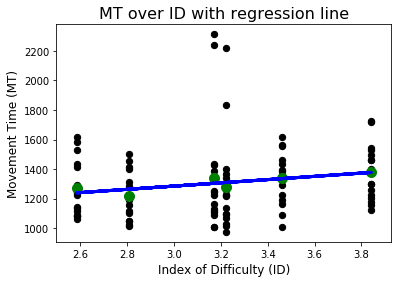

In [166]:
plt.scatter(obs_x, obs_y, color='black', s=40)
plt.scatter(grp_id, avg_mt, color='green', s=100)
plt.plot(obs_x, [[a + b * x[0]] for x in obs_x], color='blue', linewidth=3)
plt.title('MT over ID with regression line', fontsize=16)
plt.xlabel("Index of Difficulty (ID)", fontsize=12)
plt.ylabel("Movement Time (MT)", fontsize=12)
plt.show()


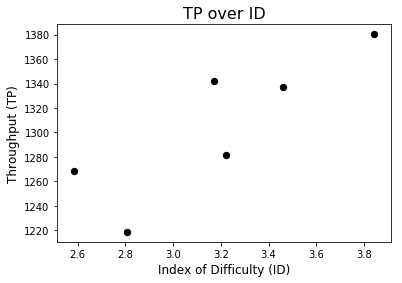

In [167]:
plt.scatter(grp_id_tp, tp, color='black', s=40)
plt.title('TP over ID', fontsize=16)
plt.xlabel("Index of Difficulty (ID)", fontsize=12)
plt.ylabel("Throughput (TP)", fontsize=12)
plt.show()
